In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
TIMESTAMP_FORMAT = "%d-%m-%Y-%H-%M-%S"

In [3]:
# helper methods
def buildTimestamp():
    return time.strftime(TIMESTAMP_FORMAT, time.localtime())

def saveFigure(sex):
    plt.savefig('../data/produced/figures/' + sex + '-suicide-rate-vs-social-media-users--' + buildTimestamp() + '.png')

## 1) Load the preprocessed dataset

In [4]:
dataset = pd.read_csv('../data/produced/final/social-media-impact-on-suicide-rates.csv')

In [5]:
dataset.head()

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


The analysis will be performed in 2 steps - visual analysis of the correlation and correlation coefficient.

## 2) Observe visualizations for different social media and groups

We plot the development of all 3 variables to see if there is a connection of the 'Suicide Rate % change since 2010' to the changes in user counts of Facebook and Twitter

In [6]:
def buildRelationshipPlot(dataframe, gender):
    plt.figure(num = 3, figsize=(8, 5))
    plt.plot(dataframe['year'], dataframe['Suicide Rate % change since 2010'],
         linestyle = '--',
         label = 'Suicide rate')
    plt.plot(dataframe['year'], dataframe['Facebook user count % change since 2010'], 
         color='red',   
         label = 'Facebook users'
        )
    plt.plot(dataframe['year'], dataframe['Twitter user count % change since 2010'], 
         color='green',   
         label = 'Twitter users'
        )
    plt.xlabel("Year")
    plt.ylabel("% change from 2010")
    plt.title(gender + " suicide rate % change from 2010 in constrast to Facebook and Twitter user count % change")
    plt.legend()

### 2.1) Males

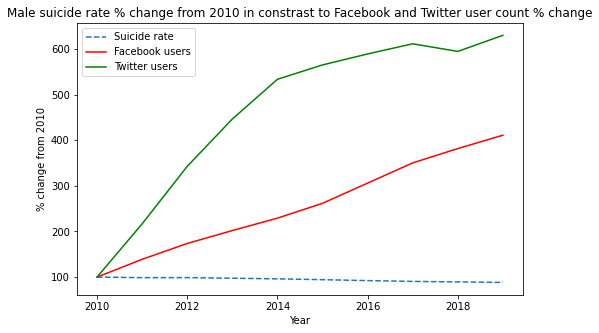

In [7]:
males = dataset[dataset['sex'] == 'MLE']

buildRelationshipPlot(males, 'Male')
saveFigure('males')
plt.show()

### 2.2) Females

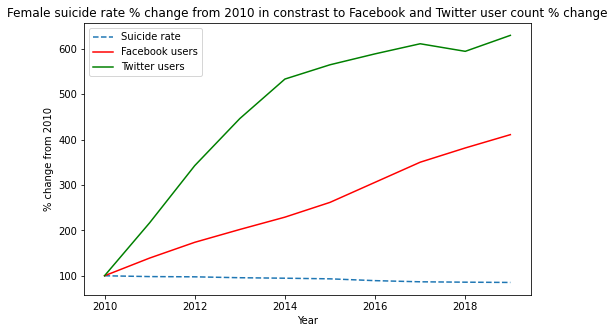

In [8]:
females = dataset[dataset['sex'] == 'FMLE']

buildRelationshipPlot(females, 'Female')
saveFigure('females')
plt.show()

### 2.3) Combined

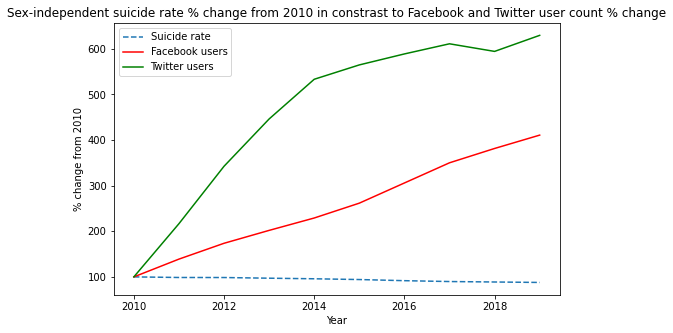

In [9]:
combined = dataset[dataset['sex'] == 'BTSX']

buildRelationshipPlot(combined, 'Sex-independent')
saveFigure('combined')
plt.show()

As can be seen the hypothesis that the onset of social media has no direct imact on the suicide rates in either of the genders in spite of users consuming only the fake best possible snapshost of others lives which questions ones value and self worth. 

From the data it appears that the assumed general lower level of self satisfaction is likely not impactful enough to cause a suicide.

## 3) Correlations of suicide rates and user count changes

It has been seen that the correlation of the data seems to be non-existent, we verify this connection with correlation calculation to quantize the relationship.

### Facebook correlation

#### Males

In [10]:
males['Suicide Rate % change since 2010'].corr(males['Facebook user count % change since 2010'])

-0.9911998289878664

#### Females

In [11]:
females['Suicide Rate % change since 2010'].corr(females['Facebook user count % change since 2010'])

-0.991072511083262

#### Combined

In [12]:
combined['Suicide Rate % change since 2010'].corr(combined['Facebook user count % change since 2010'])

-0.9922776663918123

For Facebook it can be seen that there is an anticorrelation so the opposite of our hypothesis seems to be the truth - provided only the data used in this experiment and making an assumption on the direct connection it appears that increasing Facebook user counts decrease the number of suicides.

### Twitter correlation

#### Males

In [13]:
males['Suicide Rate % change since 2010'].corr(males['Twitter user count % change since 2010'])

-0.8604684087529246

#### Females

In [14]:
females['Suicide Rate % change since 2010'].corr(females['Twitter user count % change since 2010'])

-0.8714216329020846

#### Combined

In [15]:
combined['Suicide Rate % change since 2010'].corr(combined['Twitter user count % change since 2010'])

-0.8656068987402058

The same correlation can be observed for Twitter but in lesser extent. Yet again, as also visible from the figures in part 2) the is a opposite effect, assuming an effect exists, compared to our hypothesis.